In [1]:
import control
import torch
import numpy as np
from torch.utils.data import DataLoader
from net_identification_utils import ControlLSTMInputs,\
    train,\
    test,\
    ControlDataset,\
    plot_discrete_output,\
    generate_data_for_rnn

In [2]:
system = control.TransferFunction(np.array([1, 0]), np.array([1, -7/12, 1/4, -1/24]), 1)

In [3]:
train_dataset = generate_data_for_rnn(
    control_sys=system,
    impact_time=1000,
    n_signals=100,
    n_samples_per_signal=10,
    sample_u_size=100,
    sample_response_size=20,                                                   # frequency range
    u_signal_generation_func=lambda x: np.sin(np.arange(x) * np.random.uniform(low=0.05, high=0.1)) / 2
)

In [4]:
model = ControlLSTMInputs(
    window_size=100, layer_input_size=20, hidden_size=50, output_size=20, num_layers=2
)

In [5]:
train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)

In [6]:
train(model, 100, train_dataloader, torch.nn.MSELoss())

epoch 0, mse 0.17245650115888567
epoch 1, mse 0.005798658159328625
epoch 2, mse 0.0018080355826532468
epoch 3, mse 0.0009662544640013948
epoch 4, mse 0.0006606954595190473
epoch 5, mse 0.00045361470853094943
epoch 6, mse 0.000342769658745965
epoch 7, mse 0.0002638681688404176
epoch 8, mse 0.0001983251186175039
epoch 9, mse 0.00015697547161835245
epoch 10, mse 0.00012861419410910456
epoch 11, mse 0.00012791710229066668
epoch 12, mse 0.00010973907097650226
epoch 13, mse 8.222962002037093e-05
epoch 14, mse 8.279875084554077e-05
epoch 15, mse 6.956048560823547e-05
epoch 16, mse 7.01457160175778e-05
epoch 17, mse 5.2947965268685945e-05
epoch 18, mse 7.544257759946049e-05
epoch 19, mse 4.485955545533216e-05
epoch 20, mse 3.816839347564382e-05
epoch 21, mse 4.422357560542878e-05
epoch 22, mse 4.087286910362309e-05
epoch 23, mse 3.901610622051521e-05
epoch 24, mse 3.907229242031463e-05
epoch 25, mse 3.763681888813153e-05
epoch 26, mse 3.8390876270568696e-05
epoch 27, mse 4.787496565768379e-05


In [7]:
test_dataset = generate_data_for_rnn(
    control_sys=system,
    impact_time=1000,
    n_signals=100,
    n_samples_per_signal=10,
    sample_u_size=100,
    sample_response_size=20,                                                   # frequency range
    u_signal_generation_func=lambda x: np.sin(np.arange(x) * np.random.uniform(low=0.05, high=0.1)) / 2
)

In [8]:
prediction = model(test_dataset[0][0].view(1, -1))

In [12]:
np.square(test_dataset[0][1].detach().numpy() - prediction[0, :].detach().numpy()).mean()

1.3854583e-05

In [10]:
prediction.size()

torch.Size([1, 20])

In [8]:
test(model, DataLoader(test_dataset, batch_size=10, shuffle=True), torch.nn.MSELoss())

1.1339265529386467e-05

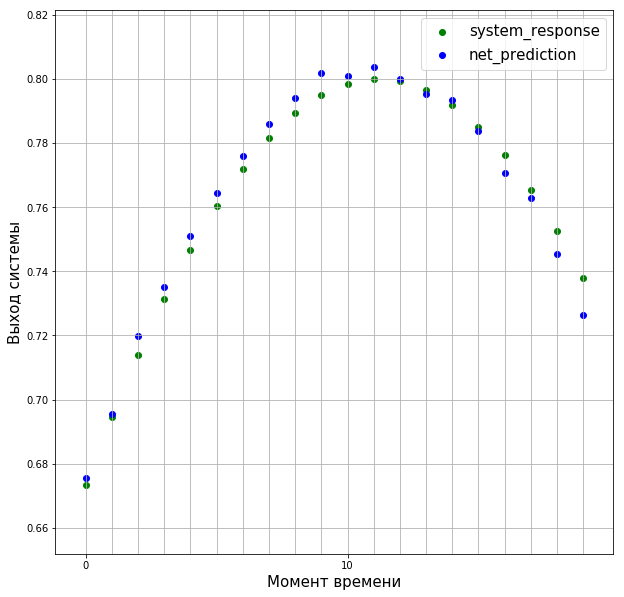

In [9]:
plot_discrete_output(
    system_response=test_dataset[1][1],
    net_prediction=model(test_dataset[1][0])
)
# test signal frequency not shifted relative to train signal

### concatenated prediction

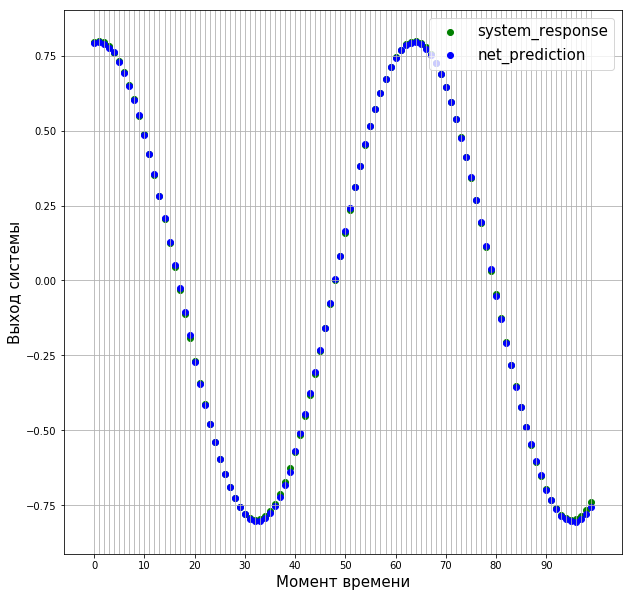

In [10]:
u = np.sin(np.arange(1000) * 0.1) / 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

###  prediction on input signal with shifted frequency relative to train data

In [11]:
test_dataset = generate_data_for_rnn(
    control_sys=system,
    impact_time=1000,
    n_signals=100,
    n_samples_per_signal=10,
    sample_u_size=100,
    sample_response_size=20,                                                   # frequency range
    u_signal_generation_func=lambda x: np.sin(np.arange(x) * np.random.uniform(low=0.1, high=0.2)) / 2
)

In [12]:
test_dataloader = DataLoader(test_dataset, batch_size=1)

In [13]:
test(model, test_dataloader, torch.nn.MSELoss())

0.06943745391999255

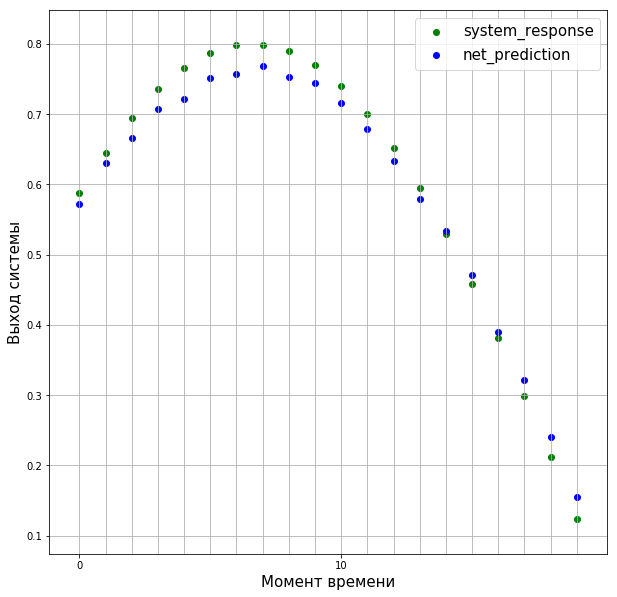

In [14]:
plot_discrete_output(
    system_response=test_dataset[0][1],
    net_prediction=model(test_dataset[0][0])
)

### concatenated prediction

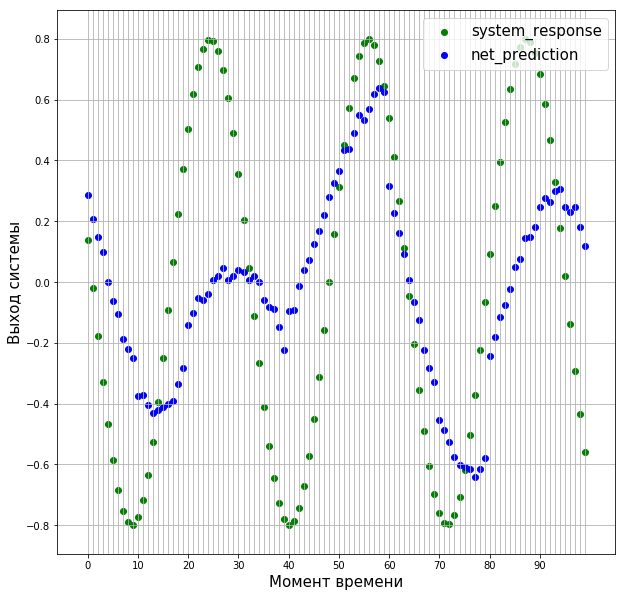

In [15]:
# frequency 0.2
u = np.sin(np.arange(1000) * 0.2) / 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='reports/rnn_prediction_long_0_2.png'
)

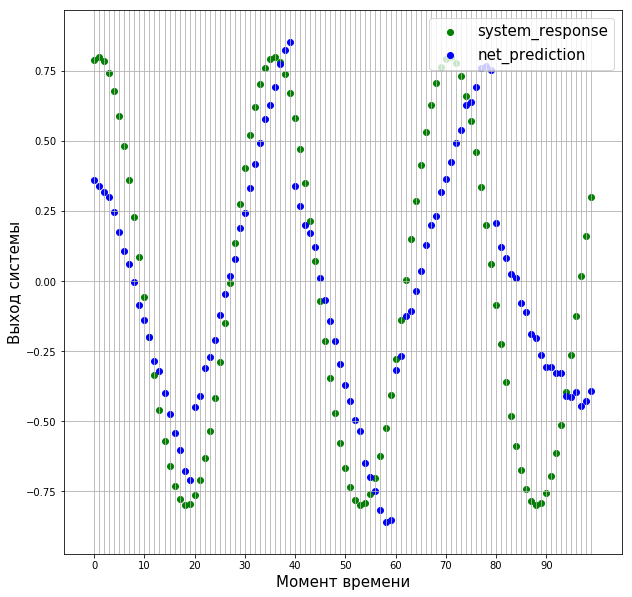

In [22]:
# frequency 0.18
u = np.sin(np.arange(1000) * 0.18) / 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

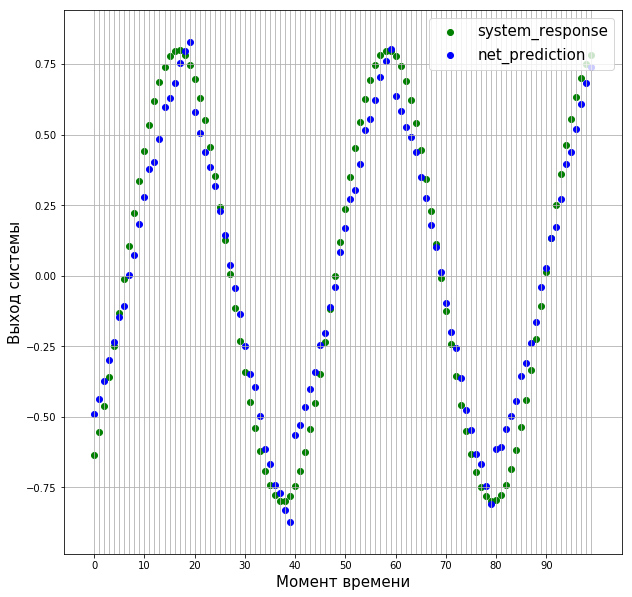

In [16]:
# frequency 0.15
u = np.sin(np.arange(1000) * 0.15) / 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='reports/rnn_prediction_long_0_15.png'
)

### sinus mixture as input

In [17]:
test_dataset = generate_data_for_rnn(
    control_sys=system,
    impact_time=1000,
    n_signals=100,
    n_samples_per_signal=10,
    sample_u_size=100,
    sample_response_size=20,
    u_signal_generation_func=lambda x:
    (   # random mixture of two sinus with different frequencies
        np.sin(np.arange(x) * np.random.uniform(low=0.1, high=0.2)) + 
        np.sin(np.arange(x) * np.random.uniform(low=0.05, high=0.1))
    ) / 4
)

In [18]:
test_dataloader = DataLoader(test_dataset, batch_size=1)

In [19]:
test(model, test_dataloader, torch.nn.MSELoss())

0.023987396709702808

### concatenated prediction

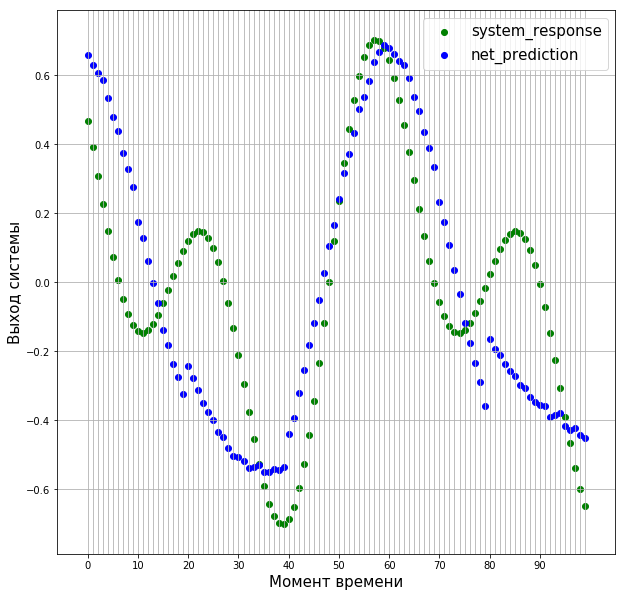

In [23]:
# mixture of sinuses with frequency 0.1 and 0.2
u = (np.sin(np.arange(1000) * 0.2) + np.sin(np.arange(1000) * 0.1)) / 4
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='reports/rnn_prediction_mix_0_1_0_2.png'
)

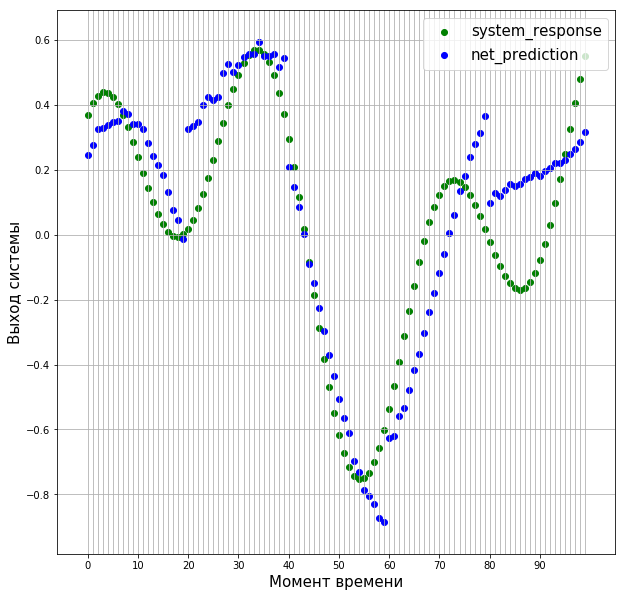

In [51]:
# mixture of sinuses with frequency 0.08 and 0.18
u = (np.sin(np.arange(1000) * 0.18) + np.sin(np.arange(1000) * 0.08)) / 4
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

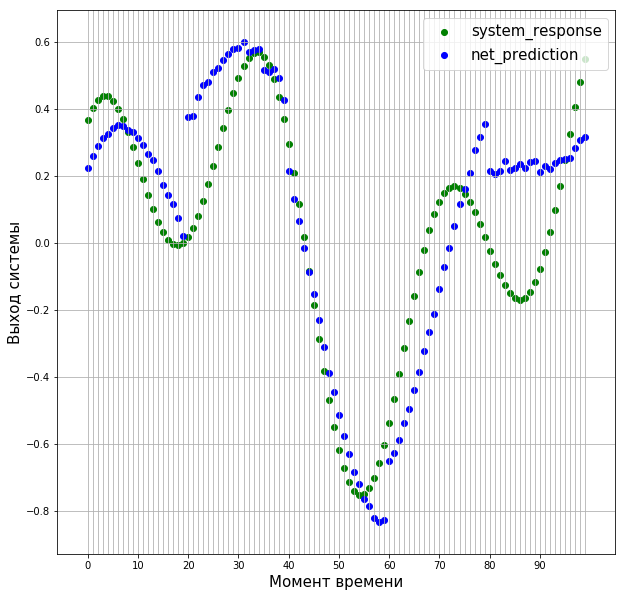

In [21]:
# mixture of sinuses with frequency 0.05 and 0.15
u = (np.sin(np.arange(1000) * 0.18) + np.sin(np.arange(1000) * 0.08)) / 4
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='reports/rnn_prediction_mix_0_05_0_15.png'
)

### magnitude increase

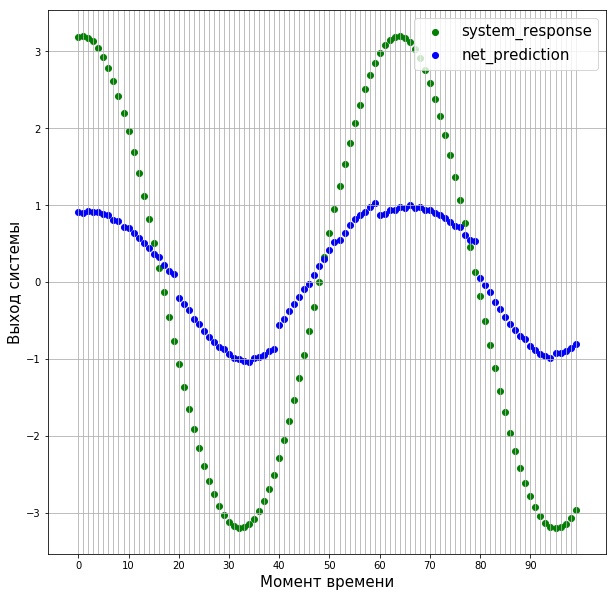

In [22]:
u = np.sin(np.arange(1000) * 0.1) * 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='reports/rnn_prediction_high_magnitude.png'
)

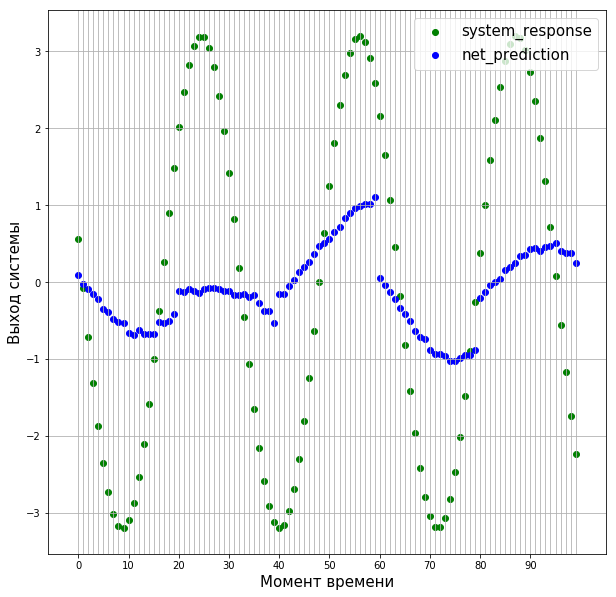

In [57]:
u = np.sin(np.arange(1000) * 0.2) * 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)

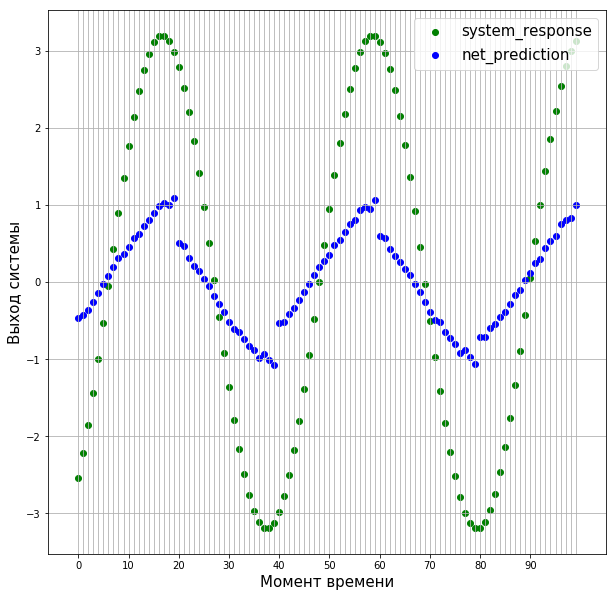

In [58]:
u = np.sin(np.arange(1000) * 0.15) * 2
prediction = np.concatenate(
    [model(torch.tensor(u[i: i + 100], requires_grad=True).float()).detach().numpy().ravel() for i in np.arange(5) * 20]
)
response = control.forced_response(system, T=np.arange(1000), U=u)[1][0]
plot_discrete_output(
    system_response=response[80:180],
    net_prediction=prediction,
    # file_name='rnn_prediction_long.png'
)